<a href="https://colab.research.google.com/github/arunkarthik-periyaswamy/Adult-Census-Income/blob/main/PERIYASWAMY_ARUNKARTHIK_50557719_CSE574.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CSE 574: Introduction to Machine Learning
##Individual Assignment 1
##Python tasks using dataset to analyze income inequality [Points: 100]


In [4]:
!cd drive/MyDrive/Intro_to_ML/Project_1_python/dataset_adult/
!ls

drive  logs.log  sample_data


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# # prompt: how to get the dataset from .data file

# import pandas as pd
# # Assuming the .data file is in the 'dataset_adult' folder in your Google Drive
# file_path = '/content/drive/MyDrive/Intro_to_ML/Project_1_python/dataset_adult/adult.data'

# # Read the .data file into a pandas DataFrame
# # Specify the column names if they are not included in the file
# column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
# df = pd.read_csv(file_path, names=column_names)

# # Print the first few rows of the DataFrame to verify the data is loaded correctly
# print(df.head())

column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
df = pd.read_csv('/content/drive/MyDrive/Intro_to_ML/Project_1_python/dataset_adult/adult.data', names= column_names)

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
with open('/content/drive/MyDrive/Intro_to_ML/Project_1_python/dataset_adult/adult.names', 'r') as file:
    for line in file:
        print(line.strip())

| This data was extracted from the census bureau database found at
| http://www.census.gov/ftp/pub/DES/www/welcome.html
| Donor: Ronny Kohavi and Barry Becker,
|        Data Mining and Visualization
|        Silicon Graphics.
|        e-mail: ronnyk@sgi.com for questions.
| Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).
| 48842 instances, mix of continuous and discrete    (train=32561, test=16281)
| 45222 if instances with unknown values are removed (train=30162, test=15060)
| Duplicate or conflicting instances : 6
| Class probabilities for adult.all file
| Probability for the label '>50K'  : 23.93% / 24.78% (without unknowns)
| Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)
|
| Extraction was done by Barry Becker from the 1994 Census database.  A set of
|   reasonably clean records was extracted using the following conditions:
|   ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))
|
| Prediction task is to determine whether a person makes over

In [9]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [10]:
df.duplicated().sum()

24

In [11]:
df.size

488415

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [13]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [14]:
df.drop_duplicates(inplace=True)
df.size

488055

In [15]:
df.dropna(inplace=True)
df.size

488055

In [16]:
df['age_group'] = pd.cut(df['age'],
                         bins=[17, 35, 50, 65, 100],
                         labels=['Young Adult', 'Adult', 'Middle-aged', 'Senior'])

print(df[['age', 'age_group']].head())


   age    age_group
0   39        Adult
1   50        Adult
2   38        Adult
3   53  Middle-aged
4   28  Young Adult


In [17]:
# import re

# dfs = df.values.astype(str)
# # df = pd.DataFrame(df)
# # print(df.head())
# any_uncommon_value = dfs.apply(lambda x: x[x.str.match(r'[^a-zA-Z0-9\-]', flags=re.IGNORECASE)])

# print(any_uncommon_value)


In [18]:
corr = df.select_dtypes("number").corr()
print(corr)

                     age    fnlwgt  education-num  capital-gain  capital-loss  \
age             1.000000 -0.076447       0.036224      0.077676      0.057745   
fnlwgt         -0.076447  1.000000      -0.043388      0.000429     -0.010260   
education-num   0.036224 -0.043388       1.000000      0.122664      0.079892   
capital-gain    0.077676  0.000429       0.122664      1.000000     -0.031639   
capital-loss    0.057745 -0.010260       0.079892     -0.031639      1.000000   
hours-per-week  0.068515 -0.018898       0.148422      0.078408      0.054229   

                hours-per-week  
age                   0.068515  
fnlwgt               -0.018898  
education-num         0.148422  
capital-gain          0.078408  
capital-loss          0.054229  
hours-per-week        1.000000  


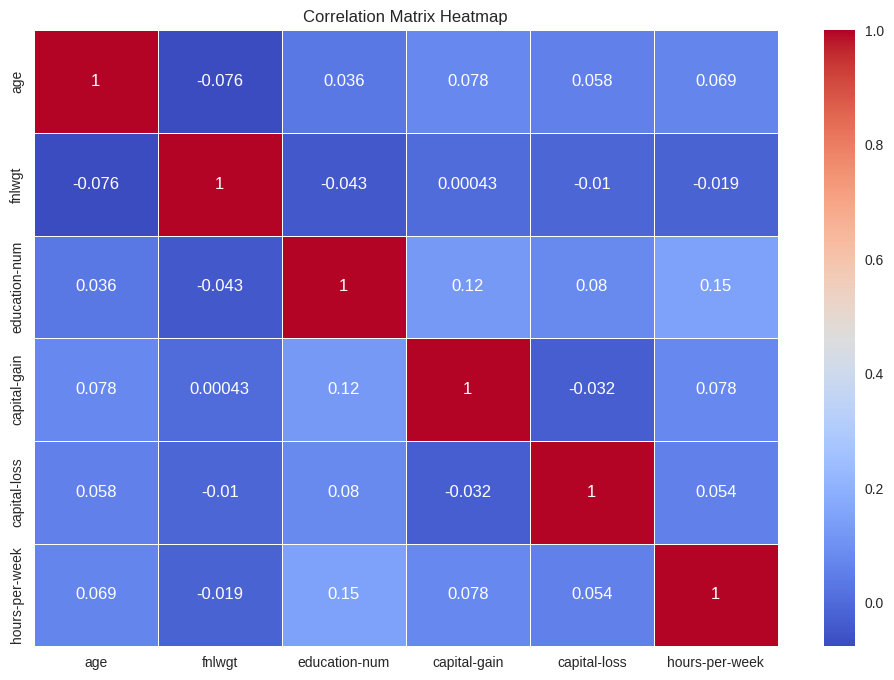

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [20]:
df['income'] = df['income'].str.strip()
df['income_category'] = df['income'].astype('str').apply(lambda x: 1 if x == '>50K' else 0)
v = df['income_category'].value_counts()
print(v)

income_category
0    24698
1     7839
Name: count, dtype: int64


In [21]:
df['native-country'].value_counts()

,count
native-country,
United-States,29153
Mexico,639
?,582
Philippines,198
Germany,137
Canada,121
Puerto-Rico,114
El-Salvador,106
India,100


In [22]:
# Script to find the unique values of all the column except numbers to get any improper values
non_numberial_features = df.select_dtypes(exclude='number')
for column in non_numberial_features.columns:
      unique_values = df[column].unique()
      print(f"Unique values in column '{column}':", unique_values, end= '\n'*2)

Unique values in column 'workclass': [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

Unique values in column 'education': [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

Unique values in column 'marital-status': [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

Unique values in column 'occupation': [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']

Unique values in column 'relationship': [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']

Unique values in column 

In [23]:
# To strip all the values of the non numerical feature dataframe
df[non_numberial_features.columns] = df[non_numberial_features.columns].apply(lambda x: x.str.strip())


In [24]:
# Found there are many values with '?' in the dataset.
# We have to data impute those by analysing it
symbol_values = df.isin(['?']).sum()
print(symbol_values)
# Get all the values which has ?
# df[symbol_values.any(axis=1)]

age                   0
workclass          1836
fnlwgt                0
education             0
education-num         0
marital-status        0
occupation         1843
relationship          0
race                  0
sex                   0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      582
income                0
age_group             0
income_category       0
dtype: int64


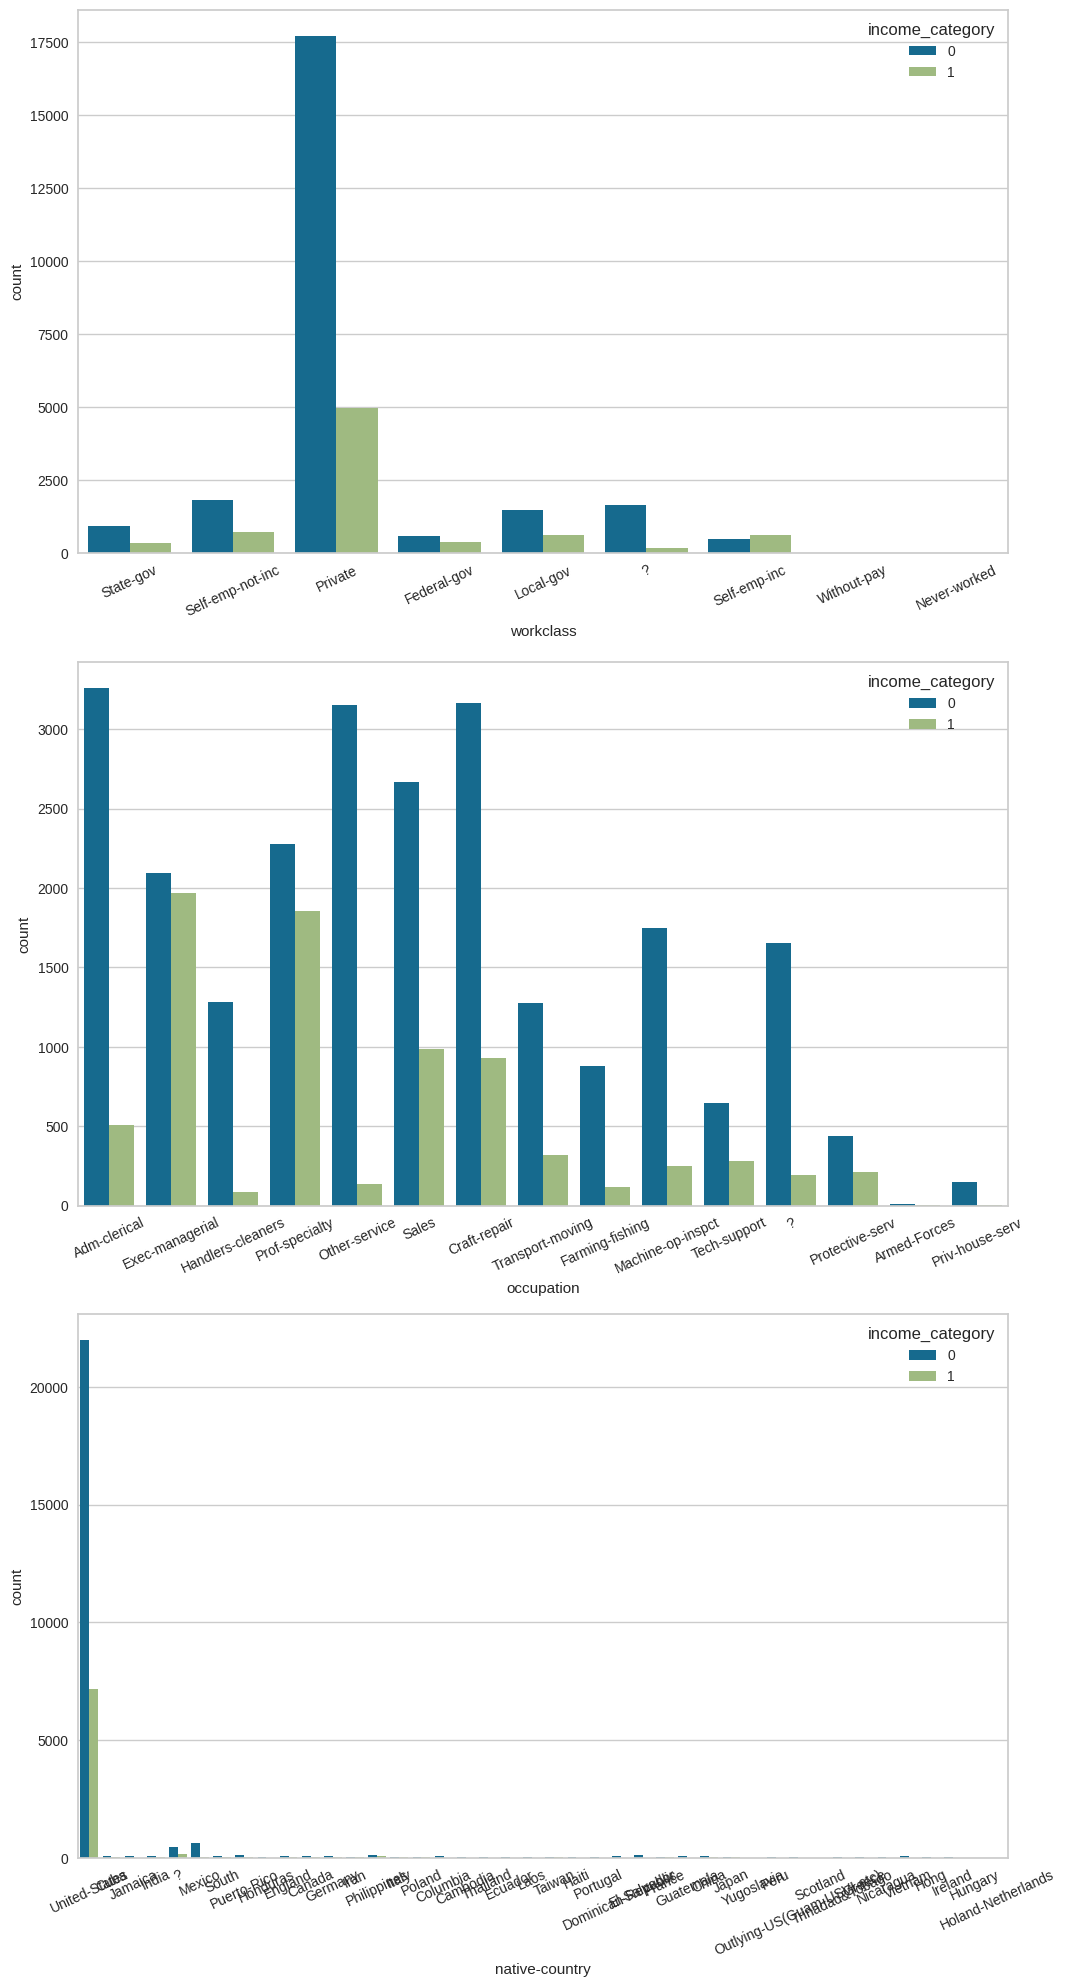

In [25]:
figure, axes = plt.subplots(3, 1, figsize=(12, 24))
sns.countplot(x='workclass', data=df, hue='income_category', ax=axes[0])
axes[0].tick_params(axis='x', rotation=25)
sns.countplot(x='occupation', data=df, hue = 'income_category', ax=axes[1])
axes[1].tick_params(axis='x', rotation=25)
sns.countplot(x='native-country', data=df, hue='income_category', ax=axes[2])
axes[2].tick_params(axis='x', rotation=25)
plt.show()

From the analysis we can use the mode values for the '?' in features 'workclass' and 'native-country' for occupation

In [29]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['workclass'] = le.fit_transform(df['workclass'])

df['education'] = le.fit_transform(df['education'])

df['marital-status'] = le.fit_transform(df['marital-status'])

df['relationship'] = le.fit_transform(df['relationship'])

df['race'] = le.fit_transform(df['race'])

df['sex'] = le.fit_transform(df['sex'])

df['native-country'] = le.fit_transform(df['native-country'])

df['age_group'] = le.fit_transform(df['age_group'])

df['occupation'] = le.fit_transform(df['occupation'])



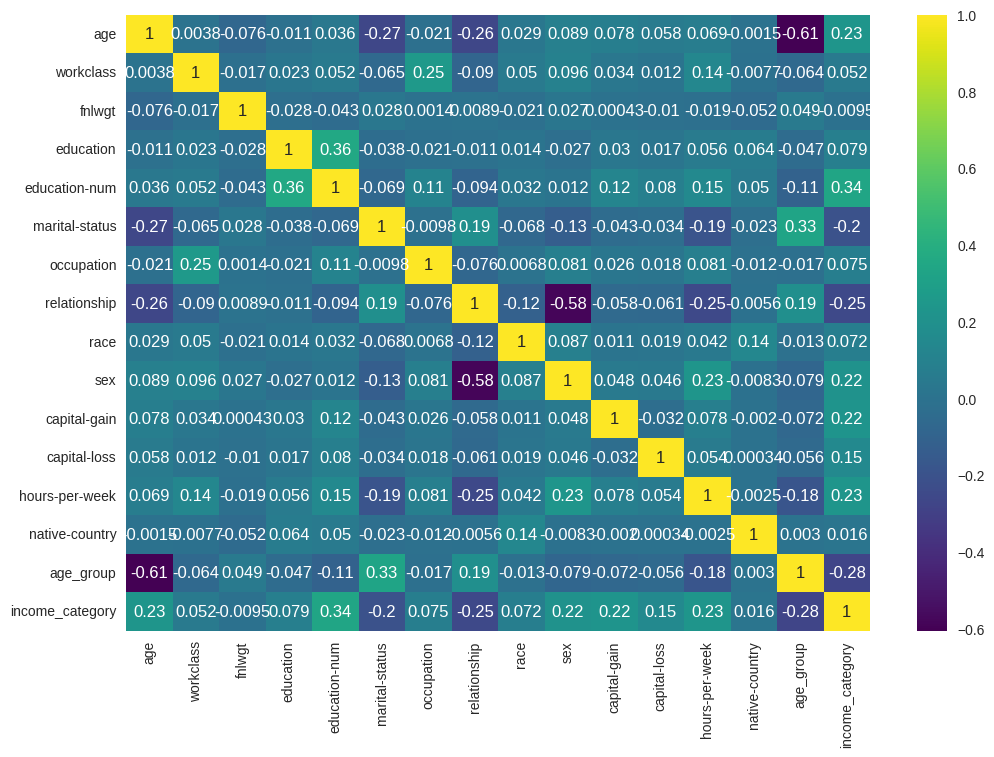

In [30]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.select_dtypes('int64').corr()
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", )
plt.show()

***From this correlation map we can find that the correlation between work class and Occupation is having high positive correlation when compared with other feateres.***

In [31]:
import pandas as pd
from sklearn.impute import KNNImputer

# Create a KNN imputer
imputer = KNNImputer(n_neighbors=5)

# Fit the imputer to the data
print(df['occupation'].dtype, df['occupation'].dtype)
imputed_data = imputer.fit_transform(df[['workclass', 'occupation']])

# Replace missing values in the original DataFrame
df[['workclass', 'occupation']] = imputed_data

int64 int64


**So the values both in workclass and occupation has been imputed usign the knnimputer based on the correlation. **

In [32]:
df['native-country'] = df['native-country'].replace('?','United-States')


***From the above grapgh we can conclude that the native country 'United Stetes' has the highest mode value so we imputed the unknown values as the same***

In [33]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1Afqt2r1eQPquvTtcVUIfjZpU7_xDU-7QBT9EMpYfqbs#gid=0


KeyboardInterrupt: 

In [34]:
# Found there are many values with '?' in the dataset.
# We have to data impute those by analysing it
symbol_values = df.isin(['?']).sum()
print(symbol_values)
# Get all the values which has ?
# df[symbol_values.any(axis=1)]

age                0
workclass          0
fnlwgt             0
education          0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
age_group          0
income_category    0
dtype: int64


In [35]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_group,income_category
0,39,7.0,77516,9,13,4,1.0,1,4,1,2174,0,40,39,<=50K,0,0
1,50,6.0,83311,9,13,2,4.0,0,4,1,0,0,13,39,<=50K,0,0
2,38,4.0,215646,11,9,0,6.0,1,4,1,0,0,40,39,<=50K,0,0
3,53,4.0,234721,1,7,2,6.0,0,2,1,0,0,40,39,<=50K,1,0
4,28,4.0,338409,9,13,2,10.0,5,2,0,0,0,40,5,<=50K,3,0


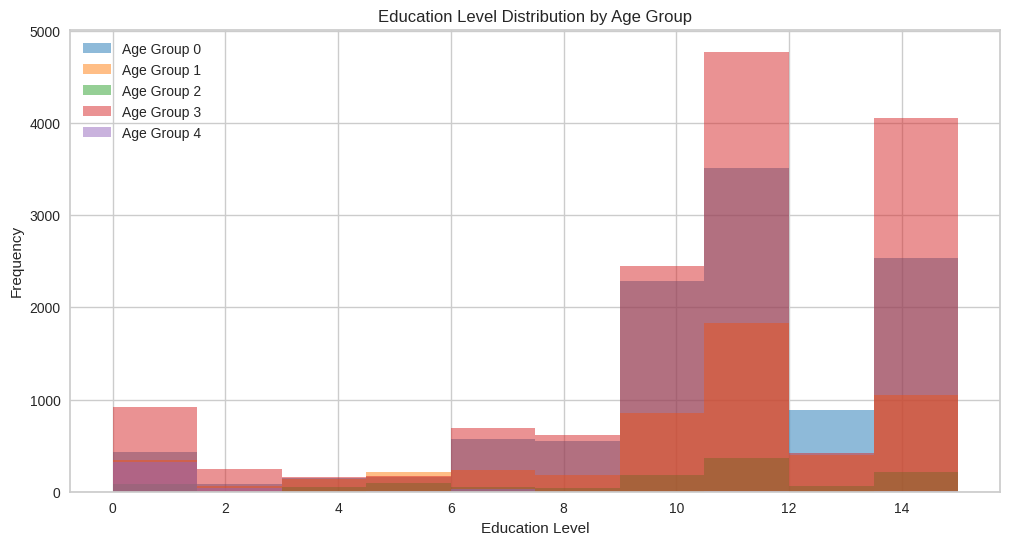

In [36]:
import matplotlib.cm as cm

plt.figure(figsize=(12, 6))

# Choose a colormap
cmap = cm.get_cmap('tab10')

for i, age_group in enumerate(df['age_group'].unique()):
    plt.hist(df[df['age_group'] == i]['education'], alpha=0.5, color=cmap(i), label=f'Age Group {i}')

plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.title('Education Level Distribution by Age Group')
_ = plt.legend()

In [37]:
df['capital-loss'].value_counts()

,count
capital-loss,
0,31018
1902,202
1977,168
1887,159
1848,51
...,...
2080,1
1539,1
1844,1


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              32537 non-null  int64  
 1   workclass        32537 non-null  float64
 2   fnlwgt           32537 non-null  int64  
 3   education        32537 non-null  int64  
 4   education-num    32537 non-null  int64  
 5   marital-status   32537 non-null  int64  
 6   occupation       32537 non-null  float64
 7   relationship     32537 non-null  int64  
 8   race             32537 non-null  int64  
 9   sex              32537 non-null  int64  
 10  capital-gain     32537 non-null  int64  
 11  capital-loss     32537 non-null  int64  
 12  hours-per-week   32537 non-null  int64  
 13  native-country   32537 non-null  int64  
 14  income           32537 non-null  object 
 15  age_group        32537 non-null  int64  
 16  income_category  32537 non-null  int64  
dtypes: float64(2), in

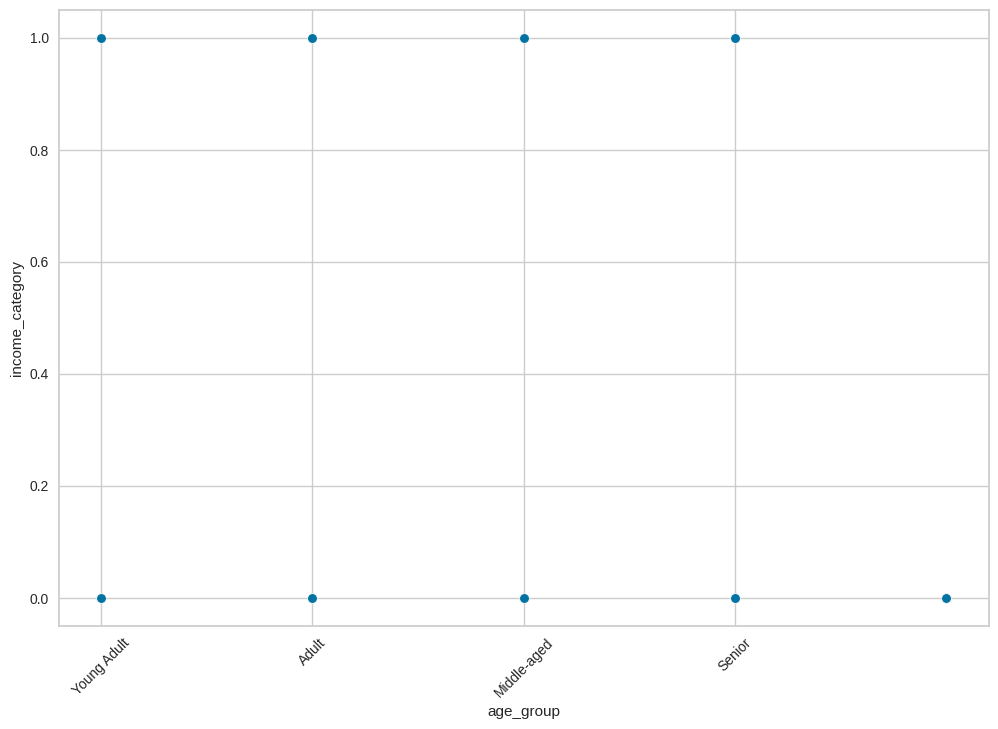

In [39]:
plt.figure(figsize=(12,8))
sns.scatterplot(y=df['income_category'], x=df['age_group'], data=df)
x_ticks = ['Young Adult', 'Adult', 'Middle-aged', 'Senior']
plt.xticks(range(len(x_ticks)), x_ticks, rotation=45)
plt.show()

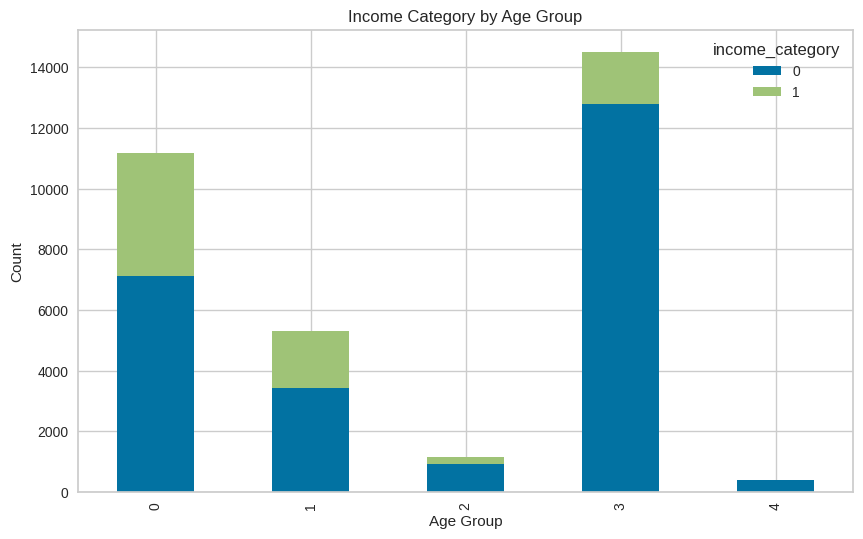

In [40]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with columns 'age_group' and 'income_category'

# Group the data by 'age_group' and count the occurrences of each 'income_category'
grouped_data = df.groupby(['age_group', 'income_category']).size().unstack()

# Create the stacked bar chart
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Income Category by Age Group')

plt.show()

From this graph it is clearly visible that the income of people deterioting over the age increases.

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'workclass'}>,
        <Axes: title={'center': 'fnlwgt'}>,
        <Axes: title={'center': 'education'}>],
       [<Axes: title={'center': 'education-num'}>,
        <Axes: title={'center': 'marital-status'}>,
        <Axes: title={'center': 'occupation'}>,
        <Axes: title={'center': 'relationship'}>],
       [<Axes: title={'center': 'race'}>,
        <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'capital-gain'}>,
        <Axes: title={'center': 'capital-loss'}>],
       [<Axes: title={'center': 'hours-per-week'}>,
        <Axes: title={'center': 'native-country'}>,
        <Axes: title={'center': 'age_group'}>,
        <Axes: title={'center': 'income_category'}>]], dtype=object)

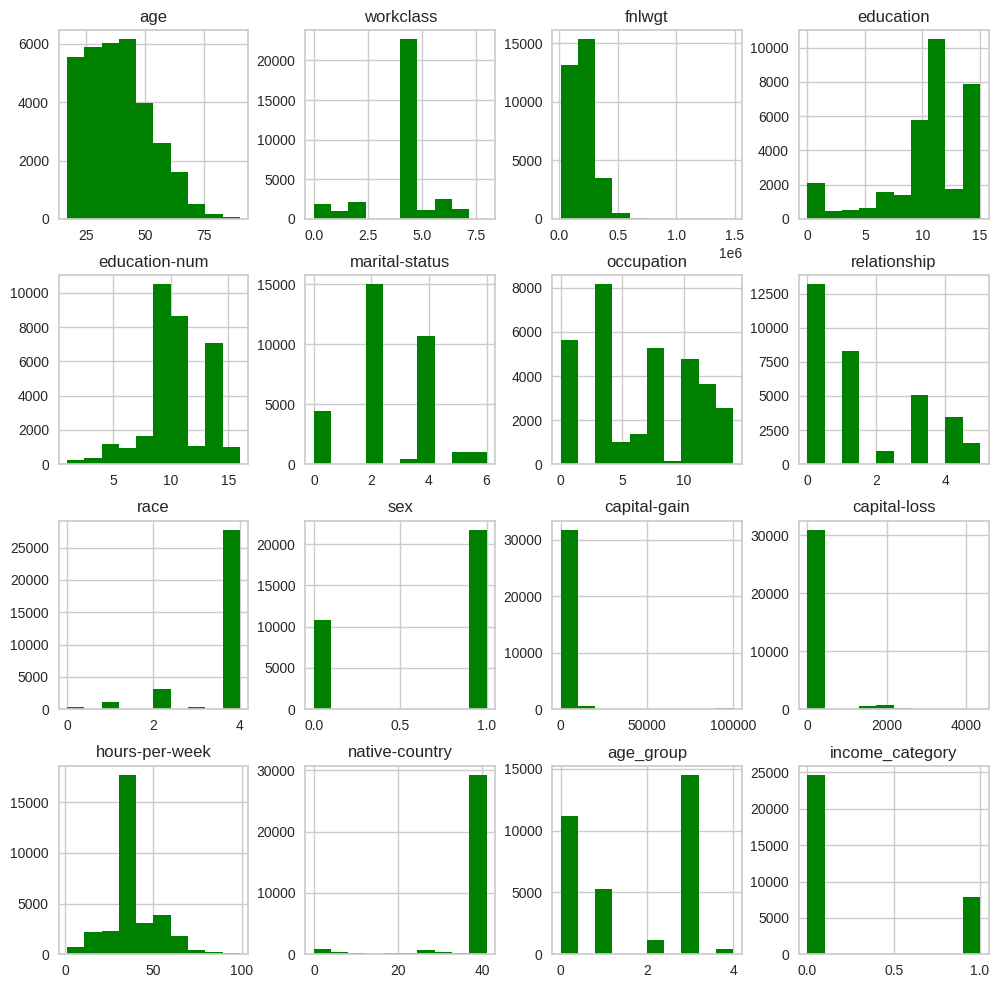

In [41]:
df.hist(figsize=(12,12),color="green")


#**Modelling** Part


In [ ]:
# !pip install pycaret

In [43]:
from pycaret.classification import *

s = setup(df, target="income_category")


,Description,Value
0,Session id,7948
1,Target,income_category
2,Target type,Binary
3,Original data shape,"(32537, 17)"
4,Transformed data shape,"(32537, 17)"
5,Transformed train set shape,"(22775, 17)"
6,Transformed test set shape,"(9762, 17)"
7,Numeric features,15
8,Categorical features,1
9,Preprocess,True


In [55]:
# drop a column
# df = df.drop('income', axis=1)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,age_group,income_category
0,39,7.0,77516,9,13,4,1.0,1,4,1,2174,0,40,39,0,0
1,50,6.0,83311,9,13,2,4.0,0,4,1,0,0,13,39,0,0
2,38,4.0,215646,11,9,0,6.0,1,4,1,0,0,40,39,0,0
3,53,4.0,234721,1,7,2,6.0,0,2,1,0,0,40,39,1,0
4,28,4.0,338409,9,13,2,10.0,5,2,0,0,0,40,5,3,0


In [56]:
best = compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1740
ridge,Ridge Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1030
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0010
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1550
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.1780
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.6640
xgboost,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.3080
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.1520
lr,Logistic Regression,0.8743,0.9082,0.6472,0.7936,0.7127,0.6334,0.6389,1.9690
lda,Linear Discriminant Analysis,0.8180,0.8467,0.4358,0.6952,0.5352,0.4296,0.4479,0.1970


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [45]:
print(best)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=7948, splitter='best')


In [46]:
evaluate_model(best)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

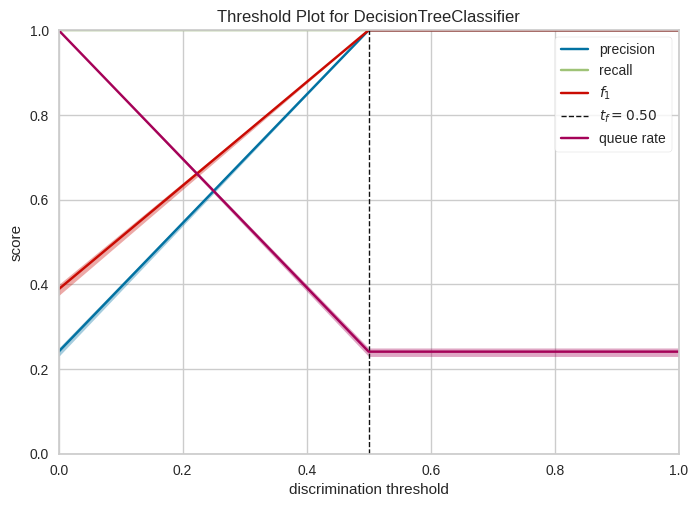

In [49]:
plot_model(best, plot = 'threshold')


In [50]:
predict_model(best)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_group,income_category,prediction_label,prediction_score
18564,30,0.0,147215,15,10,4,0.0,3,4,0,0,0,30,39,<=50K,3,0,0,1.0
28806,35,6.0,335704,15,10,2,4.0,0,4,1,0,0,40,39,<=50K,3,0,0,1.0
17348,44,4.0,215468,9,13,5,7.0,4,2,0,0,0,7,39,<=50K,0,0,0,1.0
25064,37,2.0,105266,15,10,2,14.0,0,4,1,0,0,40,39,<=50K,0,0,0,1.0
24657,24,4.0,283092,1,7,4,3.0,1,2,1,0,0,35,23,<=50K,3,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2764,19,4.0,116562,11,9,4,8.0,3,4,0,0,0,40,39,<=50K,3,0,0,1.0
13022,54,4.0,257765,5,4,0,7.0,1,4,1,0,0,40,13,<=50K,1,0,0,1.0
14065,38,4.0,177121,15,10,5,8.0,1,4,0,0,0,58,39,<=50K,0,0,0,1.0
27512,39,4.0,86143,4,3,2,8.0,0,1,1,0,0,40,30,<=50K,0,0,0,1.0


In [51]:
save_model(best, 'my_best_pipeline')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'workclass', 'fnlwgt',
                                              'education', 'education-num',
                                              'marital-status', 'occupation',
                                              'relationship', 'race', 'sex',
                                              'capital-gain', 'capital-loss',
                                              'hours-per-week', 'native-country',
                                              'age_group'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=Tr...
                                     transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                 ('trained_model',
                  DecisionTreeClassifier(ccp_al

In [52]:
loaded_model = load_model('my_best_pipeline')
print(loaded_model)


Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['age', 'workclass', 'fnlwgt',
                                             'education', 'education-num',
                                             'marital-status', 'occupation',
                                             'relationship', 'race', 'sex',
                                             'capital-gain', 'capital-loss',
                                             'hours-per-week', 'native-country',
                                             'age_group'],
                                    transformer=SimpleImputer(add_indicator=Fa...
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('trained_model',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=No

In [61]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix,accuracy_score


In [62]:
from sklearn.linear_model import LogisticRegression

x = df.drop('income_category', axis=1)
y = df['income_category']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)
X_train, Y_train = SMOTE().fit_sample(x_train, y_train)

logmodel = LogisticRegression()
logmodel.fit(X_train, Y_train)

train_print(logmodel,x_test,y_test)

AttributeError: 'SMOTE' object has no attribute 'fit_sample'